<div style="line-height:0.45">
<h1 style="color:#A3230F"> Gradient descent examples </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> tabulate
</span>
</div>

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

<div style="line-height:0.5">
<h2 style="color:#A3230F"> <u> Example 1: </u></h2>
Gradient calculation
</div>

In [59]:
def my_gradient_descent(x, y):
    """ Custom gradient descent function to optimize a linear regression model. """
    # Initialize to zero the slope (m_curr) and intercept (b_curr)
    m_curr = b_curr = 0
    # Set the number of iterations (keep the learning rate small at the beginning and then tune it)
    iterations = 100    
    n = len(x)
    learning_rate = 0.08
    data_tabulate = []
    last_m_list, last_b_list, last_cost_list = [],[],[]
    
    for i in range(iterations):
        # Calculate the predicted values using the current m and b
        y_predicted = m_curr * x + b_curr 
        # Find the mean squared error (MSE) cost function
        cost_mse = (1/n) * sum([val**2 for val in (y - y_predicted)])
        
        # Calculate the partial derivative of the cost function with respect to m
        md = -(2/n)*sum(x*(y-y_predicted)) 
        # Calculate the partial derivative of the cost function with respect to b
        bd = -(2/n)*sum(y-y_predicted) 
        
        ## Update the values of m and b using gradient descent
        m_prev = m_curr
        b_prev = b_curr        
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
        print("m {}, b {}, c {}, in iteration {}".format(m_curr, b_curr, cost_mse, i))
        data_tabulate.append([i, m_curr, b_curr, cost_mse])
        
        # Store only the last few values of m, b, and cost for plotting results
        if i >= iterations - 15:
            last_m_list.append(m_curr)
            last_b_list.append(b_curr)
            last_cost_list.append(cost_mse)

        # Check convergence condition
        if abs(m_curr - m_prev) < 1e-6 and abs(b_curr - b_prev) < 1e-6:
            print("Convergence reached at iteration", i)
            break

    ######### Visualize results
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(3, 1, figsize=(8, 10))
    ax[0].plot(last_m_list)
    ax[0].set_ylabel('m_curr')
    ax[1].plot(last_b_list)
    ax[1].set_ylabel('b_curr')
    ax[2].plot(last_cost_list)
    ax[2].set_ylabel('Cost')
    ax[2].set_xlabel('Iteration')
    plt.tight_layout()
    plt.show()

    return data_tabulate

In [60]:
x = np.random.uniform(low=1.0, high=5.0, size=(10,))
y = np.random.uniform(low=1.0, high=5.0, size=(10,))
## Round floats to 3 decimals
np.around(x, 3, out=x) # or arr_rounded = np.round(x, 3)
np.around(y, 3, out=y)
x.shape, y.shape

((10,), (10,))

m 1.1245308640000002, b 0.4867520000000001, c 10.808838, in iteration 0
m 0.7076121106606271, b 0.4427346179560959, c 4.488627881641099, in iteration 1
m 0.807232844543898, b 0.5736682080841022, c 3.685742439318318, in iteration 2
m 0.7349331516129369, b 0.6435315679104145, c 3.50441239122834, in iteration 3
m 0.7209981431738298, b 0.7313344792967604, c 3.3966009045580146, in iteration 4
m 0.6883739366733916, b 0.8107010544200233, c 3.3008085879104843, in iteration 5
m 0.6628183759612392, b 0.8905079199527245, c 3.209989090565855, in iteration 6
m 0.6356970342880579, b 0.9678378312991629, c 3.123196706817904, in iteration 7
m 0.6098808100744617, b 1.0437176974902616, c 3.040175229779484, in iteration 8
m 0.5843922132885239, b 1.1178539079656713, c 2.9607521261161684, in iteration 9
m 0.5595414951478964, b 1.1903935002801969, c 2.884770459316619, in iteration 10
m 0.53520849717843, b 1.261335036645482, c 2.8120810015327313, in iteration 11
m 0.5114174005815726, b 1.3307257014625529, c 2

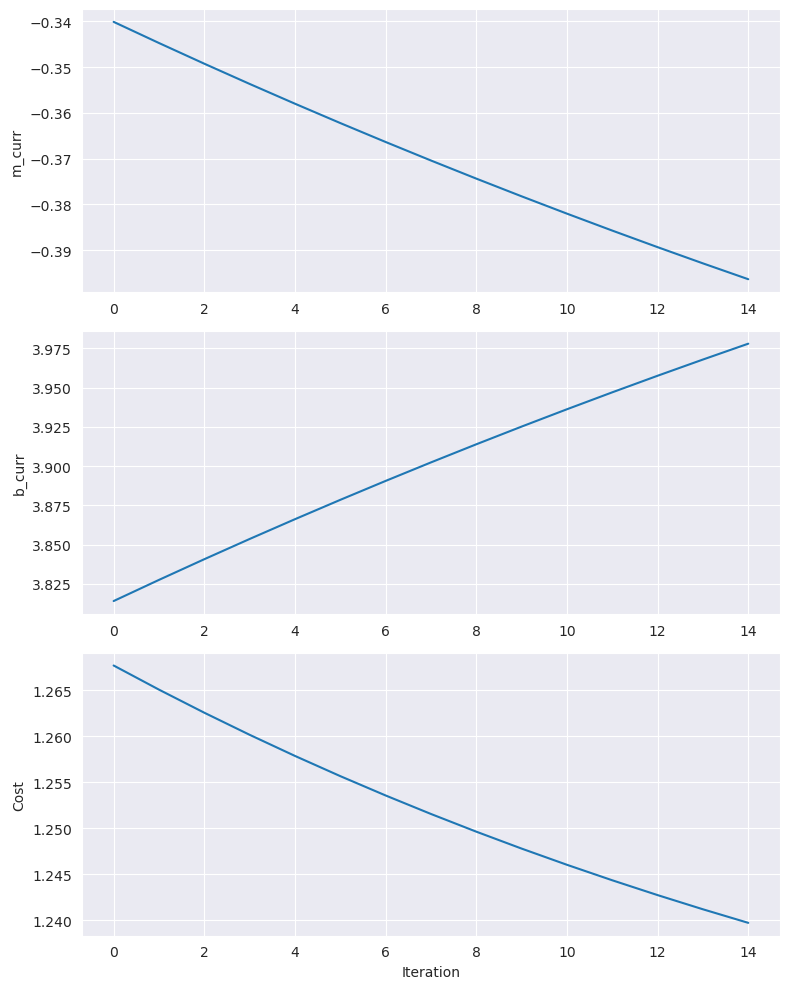

In [47]:
data_to_create_table = my_gradient_descent(x,y)

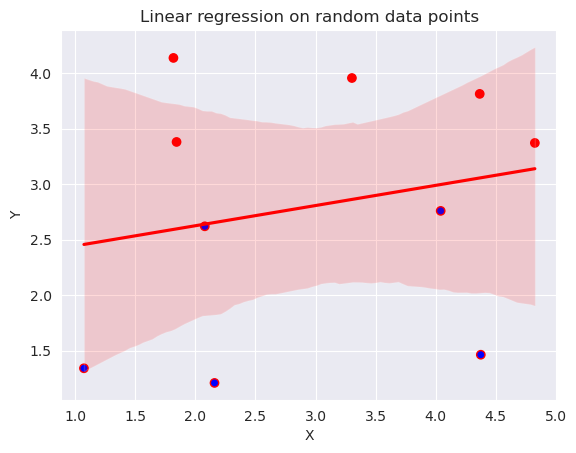

In [61]:
""" Seaborn regplot => to create scatterplots with the regression model that fit to the data points. """
ccolors = ['red' if val >= np.median(y) else 'blue' for val in y]
sns.regplot(x=x, y=y, color='red', scatter_kws={'facecolors': ccolors, 'alpha': 1}) #scatter_kws={'color': 'red'}) wrong!
plt.title('Linear regression on random data points')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### => Create tables using tabulate 

<h4>Available formats in tabulate (tablefmt param)</h4>

- "plain": Simple plain text table.
- "simple": A simple, ASCII-style table.
- "grid": A grid-style table with ASCII characters.
- "pipe": A table format using pipe characters (|) to separate columns.
- "orgtbl": An Emacs Org-mode style table.
- "tsv": Tab-separated values.
- "html": HTML table format.
- "mediawiki": Mediawiki table format, similar to Wikipedia tables.
- "latex": LaTeX table format for including in LaTeX documents.
- "rst": ReStructuredText table format for use in reStructuredText documents.
- "json": JSON format, which is useful for exporting table data in JSON.
- "latex_raw": A raw LaTeX table format that provides more control over LaTeX formatting.

In [49]:
data_to_create_table[:10]

[[0, 1.1245308640000002, 0.4867520000000001, 10.808838],
 [1, 0.7076121106606271, 0.4427346179560959, 4.488627881641099],
 [2, 0.807232844543898, 0.5736682080841022, 3.685742439318318],
 [3, 0.7349331516129369, 0.6435315679104145, 3.50441239122834],
 [4, 0.7209981431738298, 0.7313344792967604, 3.3966009045580146],
 [5, 0.6883739366733916, 0.8107010544200233, 3.3008085879104843],
 [6, 0.6628183759612392, 0.8905079199527245, 3.209989090565855],
 [7, 0.6356970342880579, 0.9678378312991629, 3.123196706817904],
 [8, 0.6098808100744617, 1.0437176974902616, 3.040175229779484],
 [9, 0.5843922132885239, 1.1178539079656713, 2.9607521261161684]]

In [50]:
headers_to_create_table = ["Iteration", "m_curr", "b_curr", "Error"]
table = tabulate(data_to_create_table, headers_to_create_table, tablefmt="grid")

print(table)

+-------------+-------------+----------+----------+
|   Iteration |      m_curr |   b_curr |    Error |
+=============+=============+==========+==========+
|           0 |  1.12453    | 0.486752 | 10.8088  |
+-------------+-------------+----------+----------+
|           1 |  0.707612   | 0.442735 |  4.48863 |
+-------------+-------------+----------+----------+
|           2 |  0.807233   | 0.573668 |  3.68574 |
+-------------+-------------+----------+----------+
|           3 |  0.734933   | 0.643532 |  3.50441 |
+-------------+-------------+----------+----------+
|           4 |  0.720998   | 0.731334 |  3.3966  |
+-------------+-------------+----------+----------+
|           5 |  0.688374   | 0.810701 |  3.30081 |
+-------------+-------------+----------+----------+
|           6 |  0.662818   | 0.890508 |  3.20999 |
+-------------+-------------+----------+----------+
|           7 |  0.635697   | 0.967838 |  3.1232  |
+-------------+-------------+----------+----------+
|           

In [51]:
sliced_table_1 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="plain")
sliced_table_2 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="simple")
print(sliced_table_1)
print(sliced_table_2)

  Iteration    m_curr    b_curr     Error
          0  1.12453   0.486752  10.8088
          1  0.707612  0.442735   4.48863
          2  0.807233  0.573668   3.68574
  Iteration    m_curr    b_curr     Error
-----------  --------  --------  --------
          0  1.12453   0.486752  10.8088
          1  0.707612  0.442735   4.48863
          2  0.807233  0.573668   3.68574


In [52]:
sliced_table_3 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="grid")
sliced_table_4 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="pipe")
print(sliced_table_3)
print("\n", sliced_table_4)

+-------------+----------+----------+----------+
|   Iteration |   m_curr |   b_curr |    Error |
+=============+==========+==========+==========+
|           0 | 1.12453  | 0.486752 | 10.8088  |
+-------------+----------+----------+----------+
|           1 | 0.707612 | 0.442735 |  4.48863 |
+-------------+----------+----------+----------+
|           2 | 0.807233 | 0.573668 |  3.68574 |
+-------------+----------+----------+----------+

 |   Iteration |   m_curr |   b_curr |    Error |
|------------:|---------:|---------:|---------:|
|           0 | 1.12453  | 0.486752 | 10.8088  |
|           1 | 0.707612 | 0.442735 |  4.48863 |
|           2 | 0.807233 | 0.573668 |  3.68574 |


In [53]:
sliced_table_5 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="orgtbl")
sliced_table_6 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="tsv")
print(sliced_table_5)
print(sliced_table_6)

|   Iteration |   m_curr |   b_curr |    Error |
|-------------+----------+----------+----------|
|           0 | 1.12453  | 0.486752 | 10.8088  |
|           1 | 0.707612 | 0.442735 |  4.48863 |
|           2 | 0.807233 | 0.573668 |  3.68574 |
  Iteration	  m_curr	  b_curr	   Error
          0	1.12453 	0.486752	10.8088
          1	0.707612	0.442735	 4.48863
          2	0.807233	0.573668	 3.68574


In [54]:
sliced_table_7 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="html")
sliced_table_8 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="mediawiki")
print(sliced_table_7)
print(sliced_table_8)

<table>
<thead>
<tr><th style="text-align: right;">  Iteration</th><th style="text-align: right;">  m_curr</th><th style="text-align: right;">  b_curr</th><th style="text-align: right;">   Error</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">          0</td><td style="text-align: right;">1.12453 </td><td style="text-align: right;">0.486752</td><td style="text-align: right;">10.8088 </td></tr>
<tr><td style="text-align: right;">          1</td><td style="text-align: right;">0.707612</td><td style="text-align: right;">0.442735</td><td style="text-align: right;"> 4.48863</td></tr>
<tr><td style="text-align: right;">          2</td><td style="text-align: right;">0.807233</td><td style="text-align: right;">0.573668</td><td style="text-align: right;"> 3.68574</td></tr>
</tbody>
</table>
{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Iteration !! align="right"|   m_curr !! align="right"|   b_curr !! align="right"|    Error
|-
| align="r

In [55]:
sliced_table_9 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="latex")
sliced_table_10 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="rst")
print(sliced_table_9)
print(sliced_table_10)

\begin{tabular}{rrrr}
\hline
   Iteration &   m\_curr &   b\_curr &    Error \\
\hline
           0 & 1.12453  & 0.486752 & 10.8088  \\
           1 & 0.707612 & 0.442735 &  4.48863 \\
           2 & 0.807233 & 0.573668 &  3.68574 \\
\hline
\end{tabular}
===========  ========  ========  ========
  Iteration    m_curr    b_curr     Error
===========  ========  ========  ========
          0  1.12453   0.486752  10.8088
          1  0.707612  0.442735   4.48863
          2  0.807233  0.573668   3.68574
===========  ========  ========  ========


In [56]:
sliced_table_11 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="json")
sliced_table_12 = tabulate(data_to_create_table[:3], headers_to_create_table, tablefmt="latex_raw")
print(sliced_table_11)
print("\n", sliced_table_12)

  Iteration    m_curr    b_curr     Error
-----------  --------  --------  --------
          0  1.12453   0.486752  10.8088
          1  0.707612  0.442735   4.48863
          2  0.807233  0.573668   3.68574

 \begin{tabular}{rrrr}
\hline
   Iteration &   m_curr &   b_curr &    Error \\
\hline
           0 & 1.12453  & 0.486752 & 10.8088  \\
           1 & 0.707612 & 0.442735 &  4.48863 \\
           2 & 0.807233 & 0.573668 &  3.68574 \\
\hline
\end{tabular}


<div style="line-height:0.5">
<h2 style="color:#A3230F"> <u> Example 2: </u></h2>
</div>
Custom class for gradient calculation and visualization. <br>
- Same method for gradient_descent calculation, but there is no limit in the visualized iterations; <br>
- New method to plot show gradient_descent path; <br>
</div>

In [87]:
class MyGradientDescent:
    def __init__(self):
        self.data_tabulate = []
        self.last_m_list, self.last_b_list, self.last_cost_list = [], [], []

    def gradient_descent_execution(self, x, y):
        """ Custom gradient descent function to optimize a linear regression model. """
        # Initialize to zero the slope (m_curr) and intercept (b_curr)
        m_curr = b_curr = 0
        # Set the number of iterations (keep the learning rate small at the beginning and then tune it)
        iterations = 100    
        n = len(x)
        learning_rate = 0.08
        #data_tabulate = []
        #last_m_list, last_b_list, last_cost_list = [],[],[]
        
        for i in range(iterations):
            # Calculate the predicted values using the current m and b
            y_predicted = m_curr * x + b_curr 
            # Find the mean squared error (MSE) cost function
            cost_mse = (1/n) * sum([val**2 for val in (y - y_predicted)])
            
            # Calculate the partial derivative of the cost function with respect to m
            md = -(2/n)*sum(x*(y-y_predicted)) 
            # Calculate the partial derivative of the cost function with respect to b
            bd = -(2/n)*sum(y-y_predicted) 
            
            ## Update the values of m and b using gradient descent
            m_prev = m_curr
            b_prev = b_curr        
            m_curr -= learning_rate * md
            b_curr -= learning_rate * bd
            #print("m {}, b {}, c {}, in iteration {}".format(m_curr, b_curr, cost_mse, i))
            self.data_tabulate.append([i, m_curr, b_curr, cost_mse])
            # Store the last few values of m, b, and cost for analysis
            
            #if i >= iterations - 30:
            self.last_m_list.append(m_curr)
            self.last_b_list.append(b_curr)
            self.last_cost_list.append(cost_mse)

            # Check convergence condition
            if abs(m_curr - m_prev) < 1e-6 and abs(b_curr - b_prev) < 1e-6:
                print("Convergence reached at iteration", i)
                break

        ######### Visualize results
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(3, 1, figsize=(8, 10))
        ax[0].plot(self.last_m_list)
        ax[0].set_ylabel('m_curr')
        ax[1].plot(self.last_b_list)
        ax[1].set_ylabel('b_curr')
        ax[2].plot(self.last_cost_list)
        ax[2].set_ylabel('Cost')
        ax[2].set_xlabel('Iteration')
        plt.tight_layout()
        plt.show()
        
        return self.data_tabulate, m_curr, b_curr

    def plot_gradient_descent(self):
        """ Plot the cost function in 3d to show how it varies with different combinations of slope and intercept values. 
        
        - The surface plot in the background represents the cost function landscape. 
        - The color of the surface indicates the magnitude of the cost, \
            where darker regions represent higher costs and lighter regions represent lower costs.
        - The red markers on the surface represent the path taken by the gradient descent algorithm during optimization. \
            Each marker denotes a specific combination of slope and intercept values at a particular iteration. 
        - The connection between marker is optimization path.
        """    
        data = pd.DataFrame(self.data_tabulate, columns=['Iteration', 'm_curr', 'b_curr', 'cost_mse'])

        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        #### Create a meshgrid of m and b values
        m_values = np.linspace(-1, 1, 100)
        b_values = np.linspace(-1, 1, 100)
        m_mesh, b_mesh = np.meshgrid(m_values, b_values)
        cost_mesh = np.zeros_like(m_mesh)

        # Calculate the cost function for each combination of m (slope) and b (intercept)
        for i in range(len(m_values)):
            for j in range(len(b_values)):
                y_predicted = m_values[i] * x + b_values[j]
                cost_mesh[i, j] = np.mean((y - y_predicted) ** 2)                

        # Plot the 3D surface of the cost function
        ax.plot_surface(m_mesh, b_mesh, cost_mesh, cmap='viridis', alpha=0.6)
        # Plot the path of gradient descent
        ax.plot(self.last_m_list, self.last_b_list, self.last_cost_list, marker='o', color='red')

        ax.set_xlabel('slope')
        ax.set_ylabel('intercept')
        #ax.set_zlabel('Cost')
        
        ####### Create manually the text for the Z label, to solve the common issue of cutting the right label from the plot  
        # Clear the default Z-axis label
        ax.set_zlabel('')  
        # Adjust the position of the Z-axis label
        ax.zaxis.set_label_coords(1, 1.1)
        # Add the Z-axis label above the plot
        ax.text2D(1, 0.8, 'Cost', transform=ax.transAxes, ha='right')  

        ax.set_title('Gradient Descent => Cost function surface')

        plt.show()       

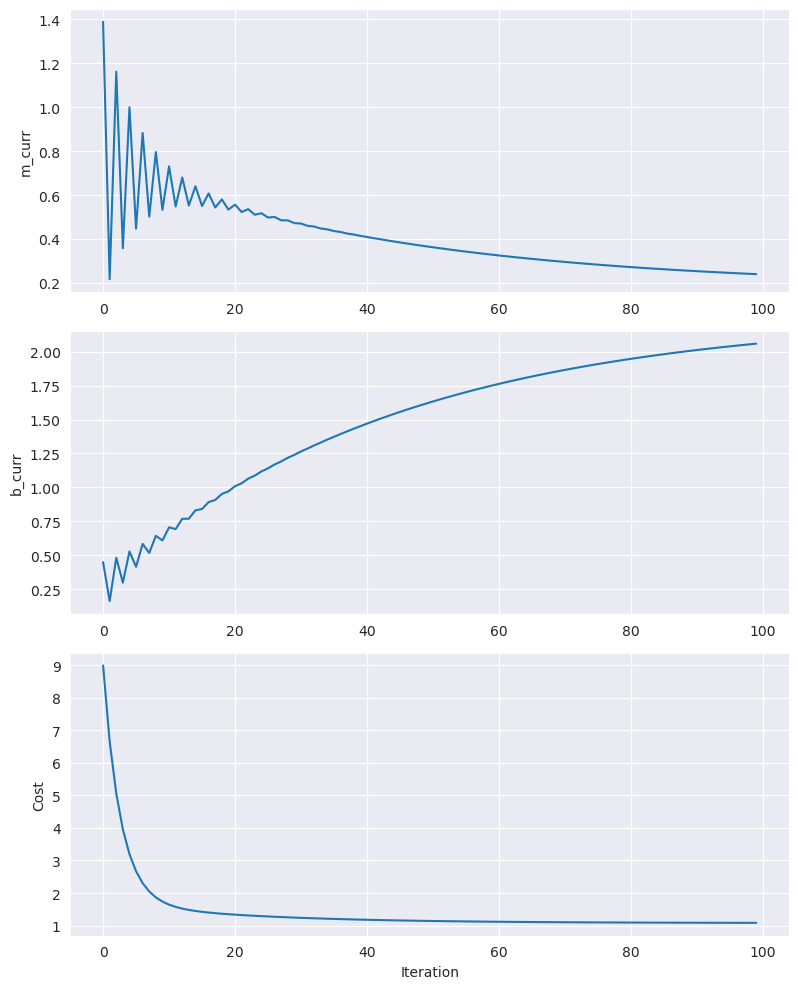

Optimized slope (m): 0.23996345149933154
Optimized intercept (b): 2.058877777448439


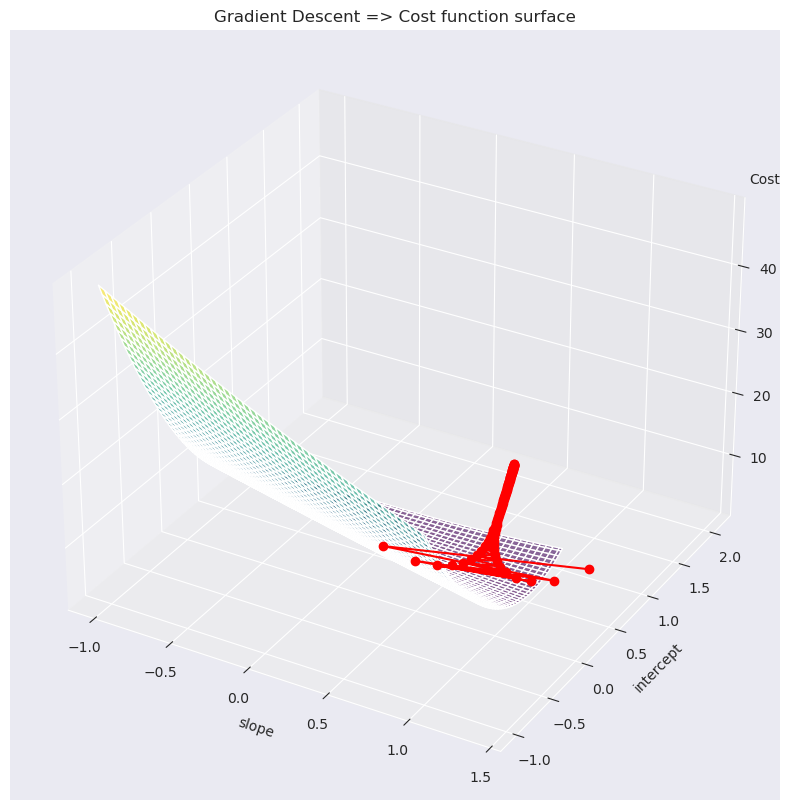

In [88]:
# Create an instance of GradientDescentVisualizer
gd_visualizer = MyGradientDescent()

# Run gradient descent and get the optimized slope and intercept
tabula, m_opt, b_opt = gd_visualizer.gradient_descent_execution(x, y)

print("Optimized slope (m):", m_opt)
print("Optimized intercept (b):", b_opt)

# Plot the gradient descent visualization
gd_visualizer.plot_gradient_descent()     